                      Coefficient
Avg. Session Length     25.724256
Time on App             38.597135
Time on Website          0.459148
Length of Membership    61.674732

Mean Absolute Error:  8.426091641432114
Mean Squared Error:  103.91554136503323
Root Mean Squared Error:  10.19389726086315


361    -2.636795
73     -7.800375
374    -8.463174
155     1.953775
104    -0.051825
         ...    
266    10.327176
23     15.027984
222   -16.778237
261    -6.021734
426    -4.371832
Name: Yearly Amount Spent, Length: 150, dtype: float64

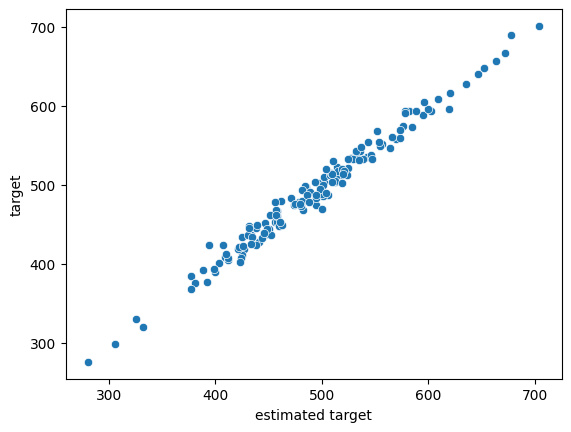

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split


df = pd.read_csv("/kaggle/input/focusing-on-mobile-app-or-website/Ecommerce Customers")

# df.head()

# df.info()

# df.describe()

# sns.jointplot(x = "Time on App", y = "Yearly Amount Spent", data=df)

# sns.pairplot(df, kind = "scatter", plot_kws={"alpha":0.4})


X = df[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
y = df['Yearly Amount Spent']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# training the model

from sklearn.linear_model import LinearRegression

# linear model
lm = LinearRegression()

lm.fit(X_train, y_train)

cdf = pd.DataFrame({"Coefficient": lm.coef_}, index=X.columns)
print(cdf)

print()

# predictions
predictions = lm.predict(X_test)
predictions

sns.scatterplot(x=predictions,y=y_test)
plt.xlabel("estimated target")
plt.ylabel("target")

# evaluate the model

from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

print("Mean Absolute Error: ", mean_absolute_error(predictions, y_test))
print("Mean Squared Error: ", mean_squared_error(predictions, y_test))
print("Root Mean Squared Error: ", math.sqrt(mean_squared_error(predictions, y_test)))

residuals = y_test - predictions
residuals